# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [969]:
#show a couple of ways to determine the nummber of rows and columns in the data
df.info()
df.shape
# determine the total number of duplicates in the dataframe
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   object  
 3   cuisine_type           1898 non-null   object  
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   object  
 6   rating                 1898 non-null   category
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
 9   total_food_time        1898 non-null   int64   
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 135.6+ KB


0

#### Observations:
While there are other means of determining the number of columns and rows, pandas' built-in info() and shape functions clearly show that there are 1898 rows and 9 columns. 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [970]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   object  
 3   cuisine_type           1898 non-null   object  
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   object  
 6   rating                 1898 non-null   category
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
 9   total_food_time        1898 non-null   int64   
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 135.6+ KB


#### Observations:

There are 4 int64 datatypes: order_id, customer_id, food_preparation_time, and deliver_time. There are 4 object datatypes: restaraunt_name, cuisine_type, day_of_the_week, and rating. Finally, there is a single float64 dataype: cost_of_the_order.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [971]:
df.info()
#df.isna() determines the number of null values in each series
missing_values = df.isna()
print(missing_values.any())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   object  
 3   cuisine_type           1898 non-null   object  
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   object  
 6   rating                 1898 non-null   category
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
 9   total_food_time        1898 non-null   int64   
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 135.6+ KB
order_id                 False
customer_id              False
restaurant_name          False
cuisine_type             False
cost_of_the_order        False
day_of_the_week          

#### Observations:
df.info() shows the full count of data in each column. As there are 1898 rows of data and all 9 columns have a Non-Null Count of 1898, this means that there are no missing values in the data. 
To double check, you can use df.isna() and print the values using .any(), which gives a boolean value to missing (True) or not missing (False). Like df.info(), df.isna() shows that there are no missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [972]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,total_food_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,19.747694,27.371970,24.161749,51.533720
std,5.480497e+02,113698.139743,9.732211,4.632481,4.972637,6.833603
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,35.000000
25%,1.477021e+06,77787.750000,13.892000,23.000000,20.000000,47.000000
50%,1.477496e+06,128600.000000,16.261000,27.000000,25.000000,52.000000
75%,1.477970e+06,270525.000000,27.871875,31.000000,28.000000,56.000000
max,1.478444e+06,405334.000000,44.262500,35.000000,33.000000,68.000000


#### Observations:
As shown above, the food_preperation_time series shows that there was a minimum duration of 20.00 minutes, a maximum duration of 35.00 minutes, and an average duration of 27.37 minutes for food to be prepared once an order is placed. 

### **Question 5:** How many orders are not rated? [1 mark]

In [973]:
#determine the total number of 'Not given' ratings
print((df['rating']=='Not given').sum())
#show all rating values
print(df['rating'].value_counts())

736
Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


#### Observations:

Using either .sum() or .value_counts(), it can be determined that 736 orders were not rated. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### order_id

For the Univariate Analysis, order_id offers little to no meaningful analytical information because its sole purpose is identification and will have a unique value for each row of data. 

#### customer_id

In [974]:
#show the total number of unique customers
df['customer_id'].nunique()

1200

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
Name: customer_id, dtype: int64


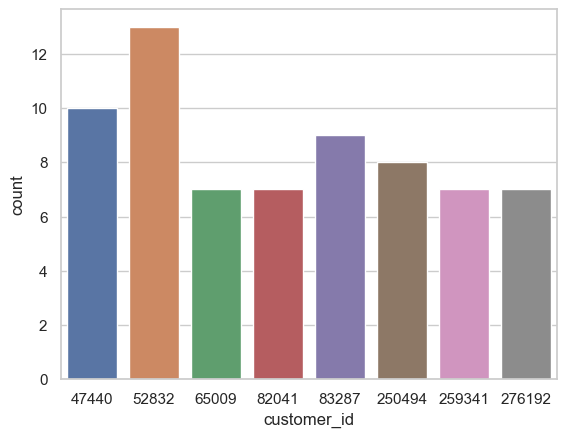

In [975]:
#determine which customers have the most orders
customer_count = df['customer_id'].value_counts()
customer_count = customer_count[customer_count>6]
print(customer_count)
#create a countplot to represent which customers have the most orders
sns.countplot(data = df[df['customer_id'].isin(customer_count.index)], x = 'customer_id');

#### Observations:

The best way that I thought to observe 'customer_id' from a Univariate perspective was to simply count the number of times that each of the 1200 customers ordered. However, due to the sheer number of customers, I displayed only those customers that ordered more than 6 times. The result is shown above in the countplot. The most any customer ordered was 13 times, which was by customer_id 52832.

#### restaurant_name

Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Nobu Next Door                    42
Name: restaurant_name, dtype: int64


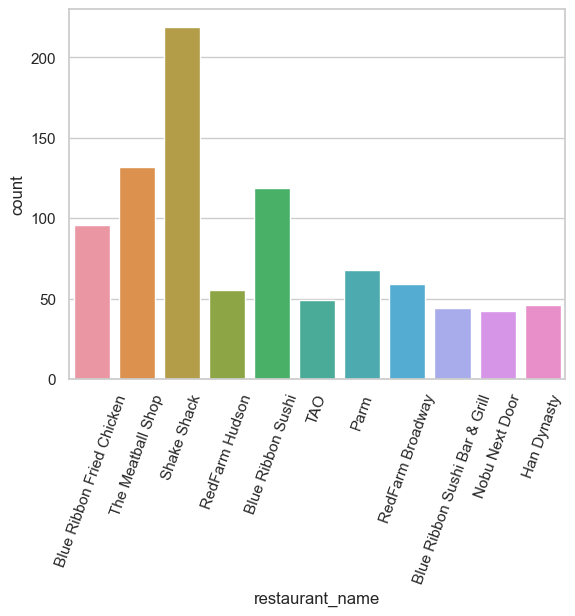

In [976]:
#determine whcih restaurants receive the most orders
restaurant_count = df['restaurant_name'].value_counts()
#limit the number of restaurants represented to only those with 40 or more orders
restaurant_count = restaurant_count[restaurant_count>=40]
#print the restaurant_count values
print(restaurant_count)
plt.xticks(rotation=70);
#create a counplot to represent which restaurants receive the most orders
sns.countplot(data = df[df['restaurant_name'].isin(restaurant_count.index)], x = 'restaurant_name');

#### Observations:

Similarly to customer_id, I chose to display only the restaurant names that had the most business. In this case, only restaurant that received 40 or more orders were included. As this countplot shows, Shake Shack had many more orders than its competitors with 219 unique orders while the second highest number of orders, The Meatball Shop, has only 132 unique orders. 

### cuisine_type

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64


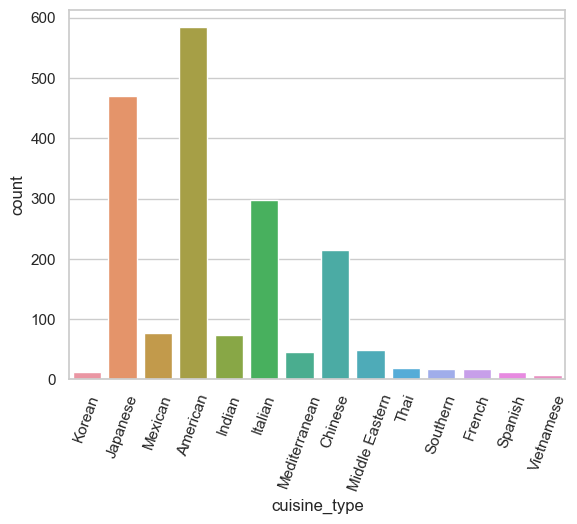

In [977]:
# determine the number of orders per cuisine type
cuisine_type_count = df['cuisine_type'].value_counts()
#print the cuisine_count values
print(cuisine_type_count)
plt.xticks(rotation=70);
#create a countplot to represent the number of orders per cuisine type
sns.countplot(data=df, x='cuisine_type');

#### Observations:

The countplot shows that American restaurants were the most popular based on number of orders with a total of 584 orders, followed by Japanese(470), Italian(298), and Chinese(215). The rest of the cuisine types each had fewer than 100 orders, with Vietnamese having the fewest(7).

#### cost_of_the_order

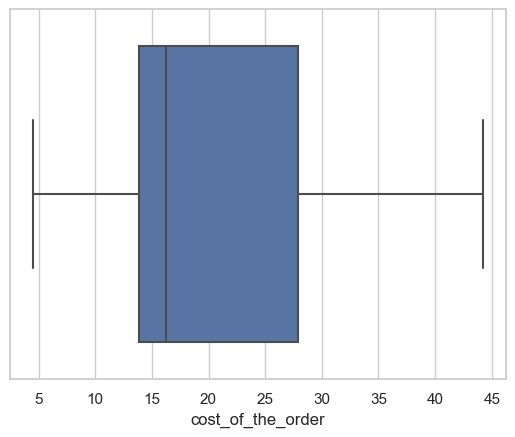

In [978]:
#create a boxplot to show the min, max, median, and IQR values of the variable
sns.boxplot(data=df, x='cost_of_the_order');

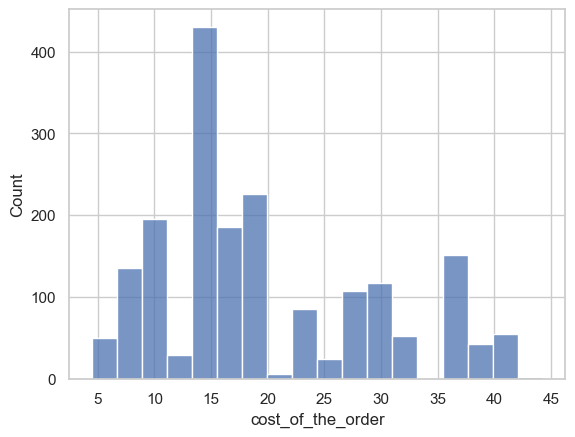

In [979]:
#create a histplot to represent the count values of the variable
sns.histplot(data=df, x='cost_of_the_order');

In [980]:
#show the descriptive statistic values for the variable
df['cost_of_the_order'].describe()

count    1898.000000
mean       19.747694
std         9.732211
min         4.470000
25%        13.892000
50%        16.261000
75%        27.871875
max        44.262500
Name: cost_of_the_order, dtype: float64

In [981]:
#show the mode for the variable
df['cost_of_the_order'].mode()

0    14.007
Name: cost_of_the_order, dtype: float64

#### Observations:

The median cost of order was 14.14 (in dollars). The boxplot shows this value with its median line just below the 15 mark. The most expensive (max) order was 35.41 and the least expensive (min) order was 4.47. There does not appear to be any outliers, meaning that the maximum value fell within Q3 + 1.5IQR and the minimum value fell within Q1 - 1.5IQR. The data is fairly right skewed, indicating that there were a greater number of lower-cost orders. The histogram supports this observation, showing that the highest frequency of orders was around 12, and using the .mode() function, we can see that it was 12.18 

#### day_of_the_week

count        1898
unique          2
top       Weekend
freq         1351
Name: day_of_the_week, dtype: object
Number of orders during the Weekend is: 1351
Number of orders during the Weekday is: 547
The Percent of orders during the Weekend is: 71.18018967334035 %
The Percent of orders during the Weekday is: 28.81981032665964 %


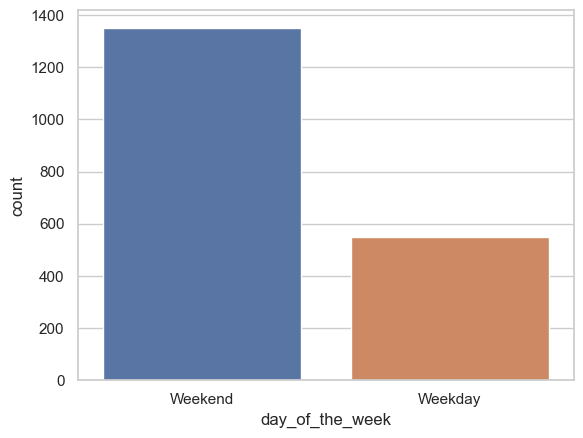

In [982]:
#create a countplot showing the count breakdown of the variable
sns.countplot(data=df, x='day_of_the_week');
#show the descriptive statistics of the variable
print(df['day_of_the_week'].describe())
#print the raw and percent values
print(f'Number of orders during the Weekend is:', 1351)
print(f'Number of orders during the Weekday is:', 1898-1351)
print(f'The Percent of orders during the Weekend is:', (1351/1898)*100,'%')
print(f'The Percent of orders during the Weekday is:', (547/1898)*100,'%')

#### Observations:

Along with the .describe() function, the countplot shows us that food was ordered much more frequently on the Weekend than on a Weekday. The frequency of Weekend orders was 1351 (71.18%) and the frequency of Weekday orders was 547 (28.82%).

#### rating

In [983]:
#The rating was in the wrong order, (4,3,5), so I made ordered = True to make the
# graphs and plots easier to understand
df['rating']=pd.Categorical(df['rating'], ordered = True)
#show the number of orders per rating value
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [984]:
#print the percent values for total ratings and only rated ratings
print(f'Total percent Not Given: ',(100-((1898 - 736)/1898)*100),'%')
print(f'Total percent 5 Star Rating: ',(100-((1898 - 588)/1898)*100),'%')
print(f'Total percent 4 Star Rating: ',(100-((1898 - 386)/1898)*100),'%')
print(f'total percent 3 Star Rating: ',(100-((1898 - 188)/1898)*100),'%')
print(588+386+188)
print(f'Percent of rated, 5 Star Rating: ',(100-((1162 - 588)/1162)*100),'%')
print(f'Percent of rated, 4 Star Rating: ',(100-((1162 - 386)/1162)*100),'%')
print(f'Percent of rated, 3 Star Rating: ',(100-((1162 - 188)/1162)*100),'%')

Total percent Not Given:  38.77766069546892 %
Total percent 5 Star Rating:  30.979978925184398 %
Total percent 4 Star Rating:  20.337197049525813 %
total percent 3 Star Rating:  9.905163329820866 %
1162
Percent of rated, 5 Star Rating:  50.60240963855422 %
Percent of rated, 4 Star Rating:  33.2185886402754 %
Percent of rated, 3 Star Rating:  16.179001721170394 %


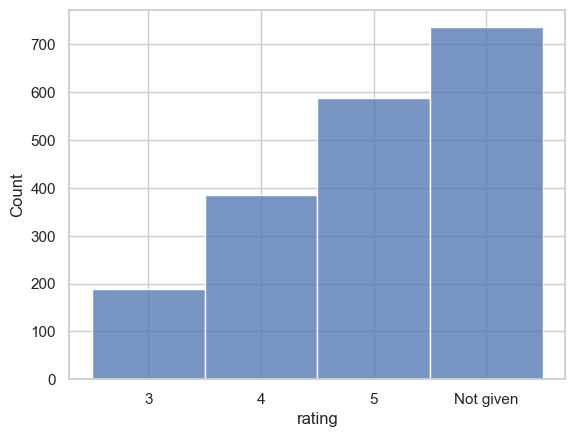

In [985]:
#create a histplot to determine the count breakdown of the variable
sns.histplot(data=df, x='rating');

#### Observations:

Because rating only has 4 values: 3, 4, 5, and 'Not given', I ran a histplot to best view the distribution and used the .value_counts() function to see the real frequencies. It seems like people were generally positive in their reviews as there are no 0, 1, or 2 star reviews and an obvious increase between 3, 4, and 5 star reviews. However, the highest frequency in the data is where a review was not given.

#### food_preparation_time

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

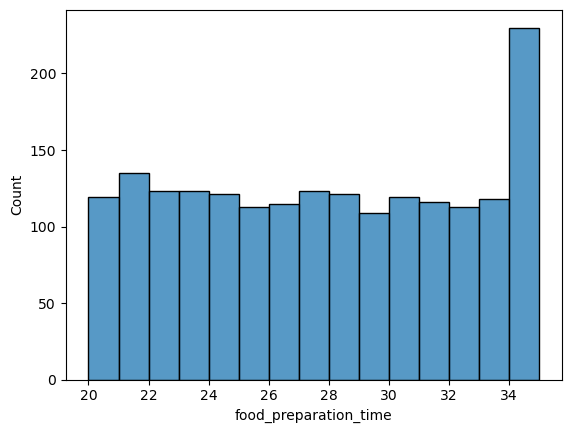

In [7]:
#create a histplot to determine the count breakdown of the variable
sns.histplot(data=df, x='food_preparation_time', binwidth = 1);
#show the descriptive statistics for the variable
df['food_preparation_time'].describe()

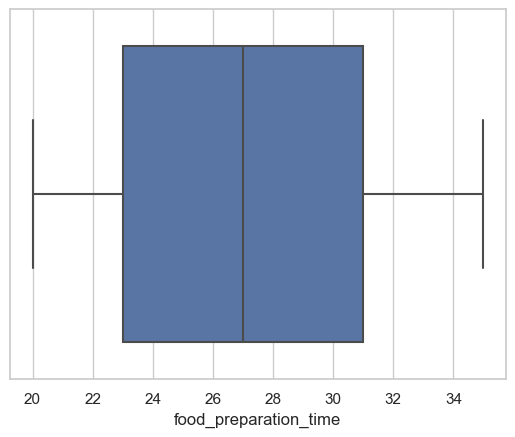

In [987]:
#create a boxplot to show the min, max, median, and IQR values of the variable
sns.boxplot(data=df, x='food_preparation_time');

#### Observations:

The boxplot shows a fairly even distribution of data between food preparation times. However, the histogram shows that there is a significant spike in orders that take 35 minutes, which is the max time value in the data set. The min value was 20 minutes and the average time for food preparation was 27.37 minutes.

#### delivery_time

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

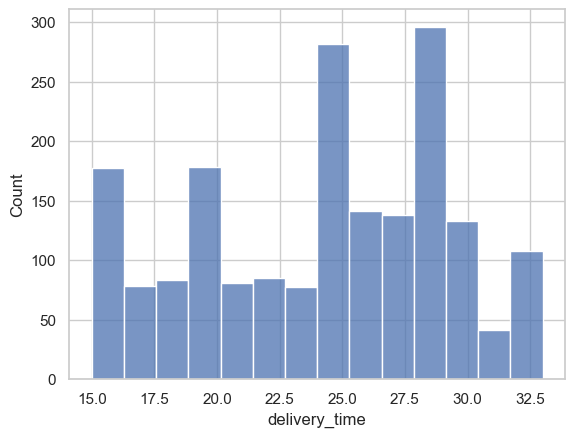

In [988]:
#create a histplot to determine the count breakdown of the variable
sns.histplot(data=df, x='delivery_time');
#show the descriptive statistics for the variable
df['delivery_time'].describe()

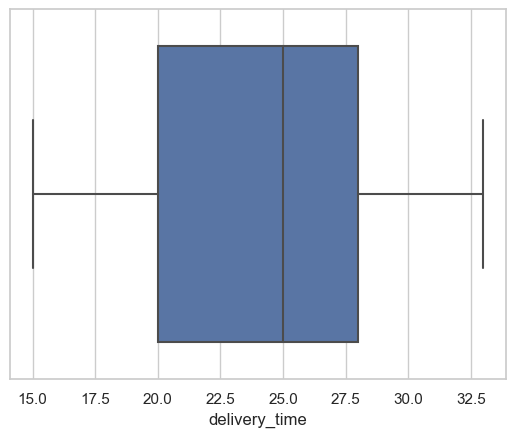

In [989]:
#create a boxplot to show the min, max, median, and IQR values of the variable
sns.boxplot(data=df, x='delivery_time');

#### Observations:

The boxplot shows a left skew in the data and is corroborated by the histogram, which shows high frequency ~25 and ~28 minute values. There was a min value of 15 minutes and a max value of 33 minutes with a mean time of 24.16 minutes for delivery. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [991]:
#show the number of orders placed at each restaurant
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:

df['restaurant_name'].value_counts shows us that Shake Shack received the highest number of orders at 219, followed by The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Fried Chicken (96), and Parm (68).

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [992]:
#group the variables into a new dataframe and create a new series called 'count'
counts = df.groupby(['restaurant_name', 'day_of_the_week']).size().reset_index(name='count')
#filter the dataframe so that only 'weekend' values are represented
weekend_counts = counts[counts['day_of_the_week'] == 'Weekend']
#sort the values by the 'count' series and put them in descending order
weekend_counts_sorted = weekend_counts.sort_values(by = 'count', ascending = False)
#print the result
print(weekend_counts_sorted[['restaurant_name', 'count']])

                  restaurant_name  count
209                   Shake Shack    145
236             The Meatball Shop     95
35              Blue Ribbon Sushi     85
33      Blue Ribbon Fried Chicken     74
186              RedFarm Broadway     44
..                            ...    ...
68              Crema Restaurante      1
67                 Coppola's East      1
66         Cipriani Le Specialita      1
95               Galli Restaurant      1
227  Tarallucci e Vino Restaurant      1

[159 rows x 2 columns]


#### Observations:

To figure out which cuisine is most popular on weekends, we can group the two series' 'restaurant_name' and 'day_of_the_week' (where 'day_of_the_week' == 'Weekend') to get the number of orders made over the weekend per restaurant. This value can be added to the dataframe as its own series called 'count'. After sorting the dataframe from highest to lowest by putting ascending = False and printing the results, we can see that Shake Shack is the most popular restaurant on weekends.



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [11]:
# find the mean value of orders above $20 and multiple it by 100
percent_above_20 = (df['cost_of_the_order']>20).mean()*100
#print the result
print(percent_above_20)

29.24130663856691


#### Observations:

An easy way to figure out the percentage of orders which cost more than 20 is to find the mean of all orders above 20 and multiply it by 100. As shown above, 29.24% of the orders cost more than 20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [994]:
#show the descriptive statistics for delivery time
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations:

Using df['delivery_time'].describe(), we can see that the mean delivery time is around 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [995]:
# get the number of unique customer IDs and determine how many orders are assigned to each
num_orders = df['customer_id'].value_counts().reset_index()
#create the columns for the new dataframe
num_orders.columns = ['customer_id', 'order_count']
#sort the dataframe by 'order_count' and put it in descending order
num_orders = num_orders.sort_values(by='order_count', ascending=False)
#show the top 3 customers
num_orders.head(3)

,customer_id,order_count
0,52832,13
1,47440,10
2,83287,9


#### Observations:

By creating a new data frame called num_orders where 'customer_id' is the same value as 'customer_id'in the df dataframe, and 'order_count' is the number of times each unique 'customer_id' value is found in the df dataframe. By setting ascending = False by the value 'order_count' and using the head() function on the num_orders dataframe, we can see the 3 customer_ids of the customers that deserve the 20% discount. Those are 52832 (13 orders), 47440 (10 orders), and 83287 (9 orders).



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


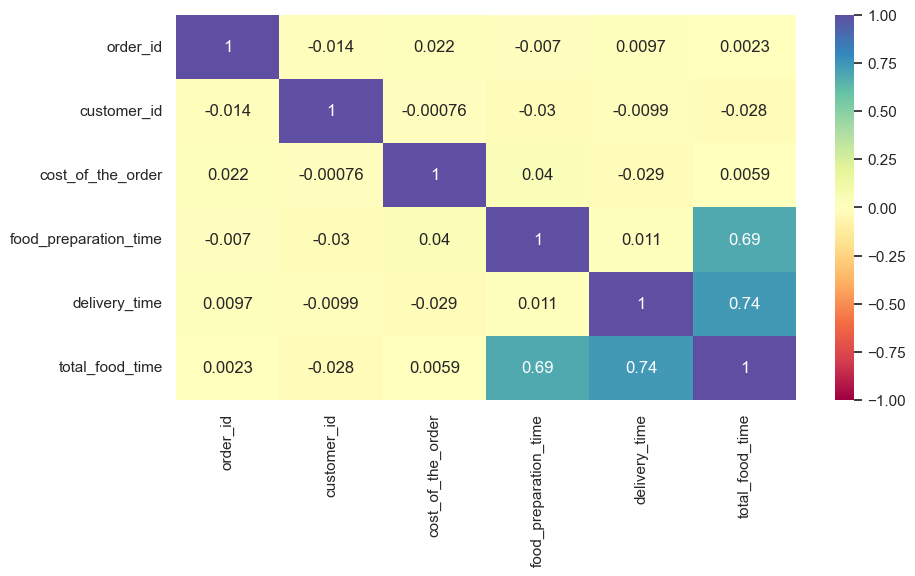

In [996]:
#create a heatmap to show how each variable correlates with each other
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observations:

My first observation, based on the heat map, is that there does not seem to be any positive or negative correlations between any of the variables. They are all middling in correlation.

### 1. rating

#### vs. restaurant_name

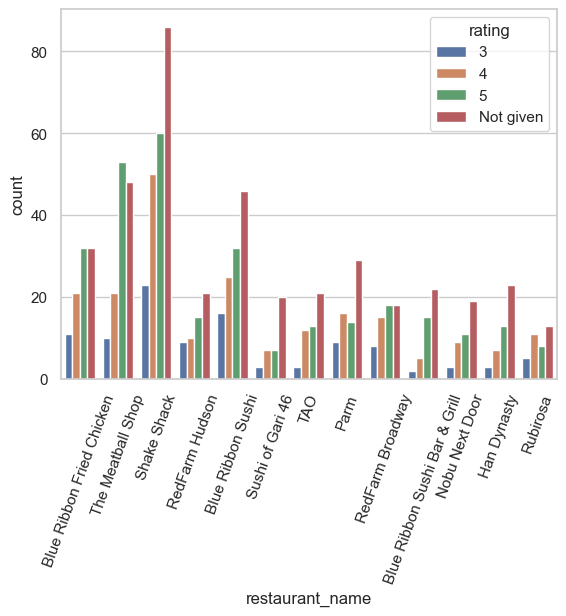

In [997]:
#count the number each restaurant name appears in the data frame and assign 
#that value to a column
restaurant_count = df['restaurant_name'].value_counts()
#filter the dataframe to only contain restaurant counts above 30 orders
popular_restaurants = restaurant_count[restaurant_count > 30].index.tolist()
#create a dataframe that only contains the names of the restaurants that remain 
#after the filter
df_popular = df[df['restaurant_name'].isin(popular_restaurants)]
#create a countplot to represent the number of orders for each restaurant based on rating
sns.countplot(x='restaurant_name', hue='rating', data=df_popular)
plt.xticks(rotation=70)
plt.show()

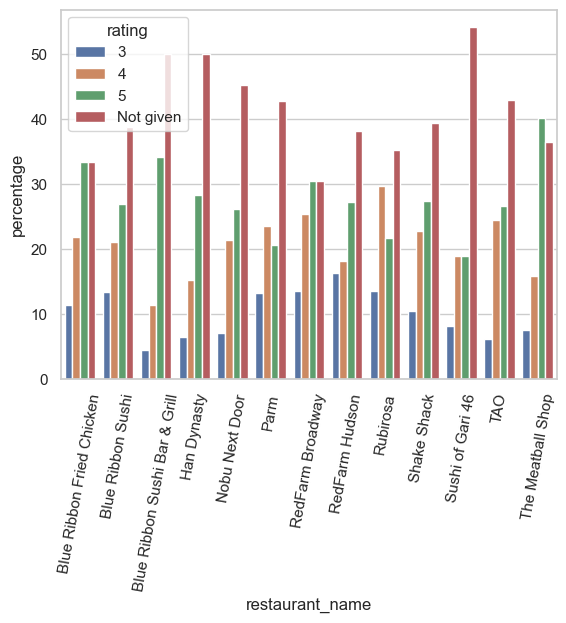

In [998]:
#count the number each restaurant name appears in the data frame and assign 
#that value to a column
restaurant_count = df['restaurant_name'].value_counts()
#filter the dataframe to only contain restaurant counts above 30 orders
popular_restaurants = restaurant_count[restaurant_count > 30].index.tolist()
#create a dataframe that only contains the names of the restaurants that remain 
#after the filter
df_popular = df[df['restaurant_name'].isin(popular_restaurants)]
#group by restaurant and rating and determine the percentage of ratings per restaurant name
ratings_per_restaurant = df_popular.groupby(['restaurant_name', 'rating']).size() / df_popular.groupby('restaurant_name').size() * 100
#create a column in the dataframe for percentages 
ratings_per_restaurant = ratings_per_restaurant.reset_index(name='percentage')
#create a barplot to represent the new percentage based data
sns.barplot(x='restaurant_name', y='percentage', hue='rating', data=ratings_per_restaurant)
plt.xticks(rotation=80)
plt.show()

#### Observations:

In order to get a good representation of the data while also keeping the integrity of the graph, I filtered out any restaurant that had only 30 or fewer orders. Originally, I viewed the countplot to determine whether there were any relationships within the data, but I quickly noticed that it was difficult to distinguish a relationship when the total count was vastly different between each restaurant. So, I used the bar graph to show the percentage ratings of each restaurant. The bar graph shows that, for example, even though Shake Shack had the most 5 star ratings of any restaurant on the countplot, fewer than 30% of its ratings were 5 stars while the 5 star ratings of 4 other restaurants counted for more than 30% of their total ratings. 
Also, The Meatball Shop is the only restaurant to have a higher number of any rating than 'Not given'. 
Finally, there was a general trend towards positive ratings with an increase rating number always having a higher count than the number before with the exceptions of Parm and Rubirosa, which had more 4 ratings than 5, and Sushi of Gari 46, which had the same number of 4 and 5 ratings. 

#### vs. cuisine_type

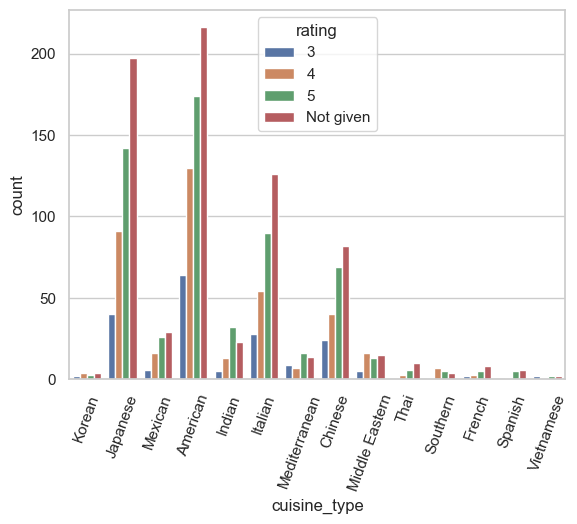

In [999]:
#create a countplot to represent the cuisine type count based on rating
sns.countplot(x='cuisine_type', hue='rating', data=df)
plt.xticks(rotation=70)
plt.show()

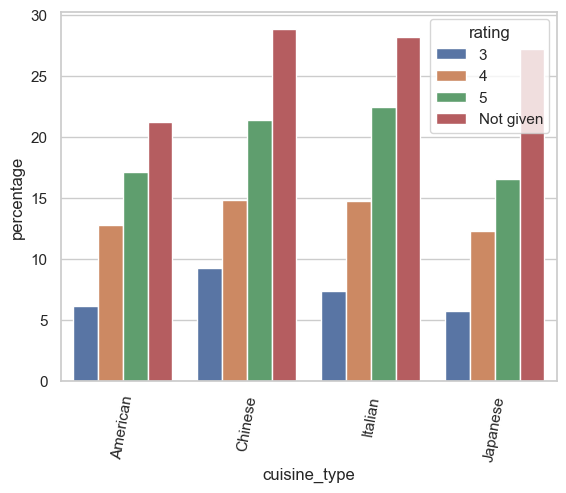

In [1000]:
#group cuisine type and rating to determine the percentage value
ratings_per_cuisine = df_popular.groupby(['cuisine_type', 'rating']).size() / df.groupby('cuisine_type').size() * 100
#create the column for the percentage value
ratings_per_cuisine = ratings_per_cuisine.reset_index(name='percentage')
#create a barplot to represent the percentage of cuisine type orders by rating
sns.barplot(x='cuisine_type', y='percentage', hue='rating', data=ratings_per_cuisine)
plt.xticks(rotation=80)
plt.show()

#### Observations:

There is a similar trend in ratings between cuisine_type and restaurant_names. People generally gave more 5 star ratings than 4 star and more 4 star ratings than 3 star with 'Not given' having the highest count and percentage across most of the cuisine types. When switching from a count graph to a bar graph, most of the variables fell off due to lack of data points. The variables shown in the bar graph are almost identical, meaning that regardless of the cuisine type, people often rated them the same way. 
However, although there is very little data, the less frequented cuisine types did not always follow that trend. Southern cuisine presented with almost an opposite trend to the rest of the cuisines and Mediterranean cuisine had more 3 star ratings than 4 star and more 5 star ratings than 'Not given'. 

#### vs. cost_of_the_order

<AxesSubplot:xlabel='cost_of_the_order', ylabel='rating'>

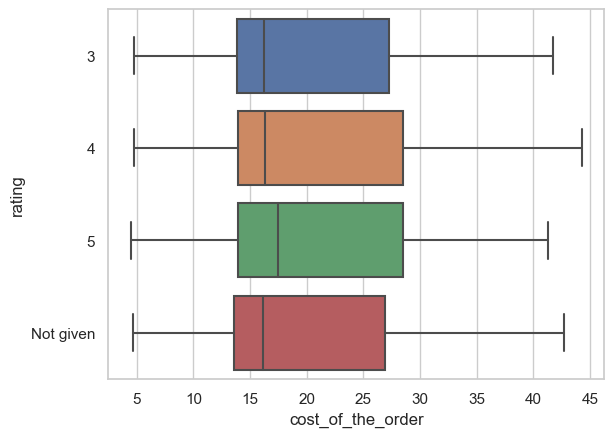

In [1001]:
#create a boxplot to show the min, max, median, and IQR values of the cost of 
#the order for each rating
sns.boxplot(data=df,x='cost_of_the_order',y='rating')

<AxesSubplot:xlabel='cost_of_the_order', ylabel='Count'>

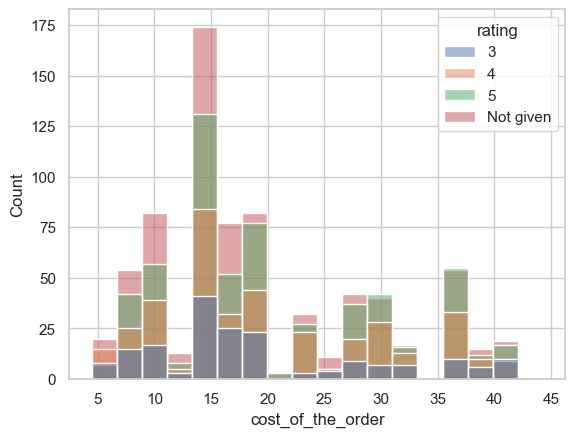

In [1002]:
#create a histplot to determine the count breakdown of the cost of the order 
#with rating as the hue
sns.histplot(data=df,x='cost_of_the_order',hue='rating')

#### Observations:

I am running cost_of_the_order against ratings to see whether how much someone pays for food will help to determine the rating they give. However, like the previous analyses, there tends to be a general trend towards positivity in these ratings. One thing that I have observed from the histplot is that the higher priced orders tend to have fewer ratings 'Not given' compared to cheaper orders. This may mean that if a person pays more for their food, they are more likely to review the service.


#### vs. day_of_the_week

<AxesSubplot:xlabel='rating', ylabel='count'>

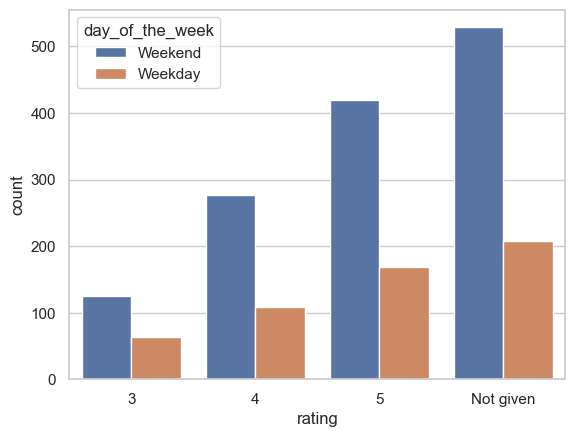

In [1003]:
#create a countplot to represent the effect of the day of the week on rating
sns.countplot(data= df, hue = 'day_of_the_week', x = 'rating')

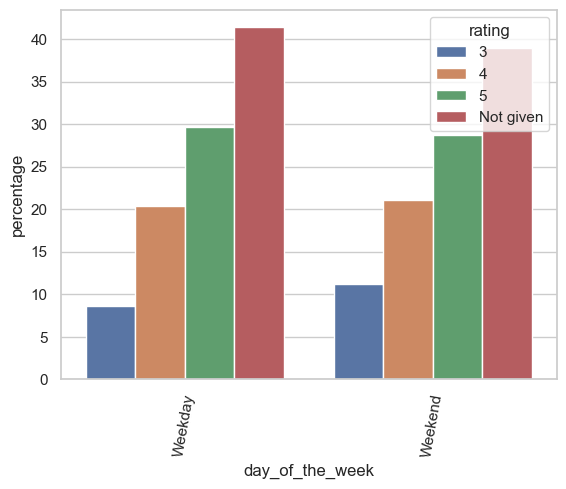

In [1004]:
#group the variables to get a percentage value
ratings_per_day_of_week = df_popular.groupby(['day_of_the_week', 'rating']).size() / df_popular.groupby('day_of_the_week').size() * 100
#rename the percentage column 
ratings_per_day_of_week = ratings_per_day_of_week.reset_index(name='percentage')
#create a barplot to represent the percentages of ratings based on the day of the week
sns.barplot(x='day_of_the_week', y='percentage', hue='rating', data=ratings_per_day_of_week)
plt.xticks(rotation=80)
plt.show()

#### Observations:

This data tells us that, while people tended to order food more frequently over the weekend, the day of the week did not appear to affect the star rating. However, it seems more people tended to rate the orders during the weekend as there was a slight decrease in the percentage of ratings 'Not given'.

#### vs. food_preparation_time & delivery_time

In [1005]:
#create a new variable for the sum of food preparation time and delivery time
df['total_food_time']= df['food_preparation_time'] + df['delivery_time']
#describe the variable
df['total_food_time'].describe()

count    1898.000000
mean       51.533720
std         6.833603
min        35.000000
25%        47.000000
50%        52.000000
75%        56.000000
max        68.000000
Name: total_food_time, dtype: float64

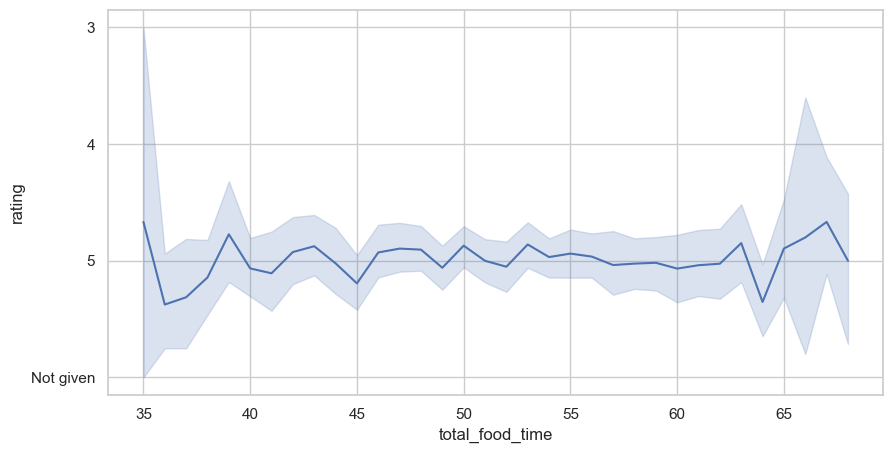

In [1006]:
#create a lineplot to represent the correlation between total food time and rating
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='total_food_time',y='rating')
plt.show()

<AxesSubplot:xlabel='total_food_time', ylabel='rating'>

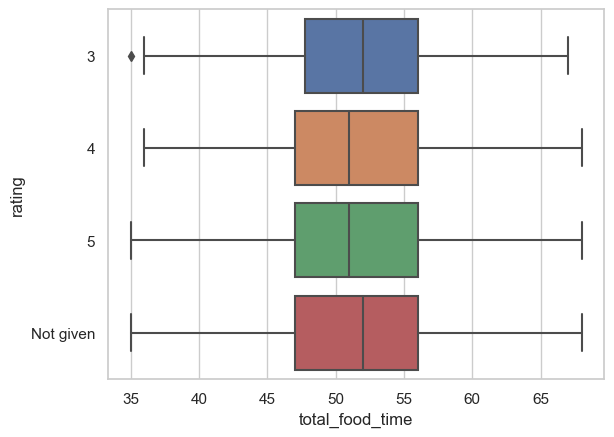

In [1007]:
#create a box plot to show the min, max, median, and IQR values of the total 
#food time for each rating
sns.boxplot(data= df, x = 'total_food_time', y = 'rating')

#### Observations:

The purpose of analyzing rating vs the total time that food was prepared and delivered was to determine whether customers were more satisfied the less time they spent waiting. However, the lineplot showed that the rating given seemed to do very little with how long the food took to get the customer. 
The boxplot shows a very small increase in a right skew between increasing ratings, meaning that people may have tended to be slightly more satisfied if the food came faster and it shows that there may have even been a very slight tendency to not give a rating at all if the food took a little longer. But, the median of each star rating stayed between 50 and 55 minutes. 

### 2. restaurant_name

#### vs. cost_of_the_order

In [1008]:
#show how many unique restaurant values are in the dataframe
df['restaurant_name'].nunique()

178

In [12]:
#create a new data frame with the filtered values of restaurants with more than 40 orders
popular_df = df[df['restaurant_name'].map(df['restaurant_name'].value_counts()) > 40]
#create columns with the mean, median, and sum values
restaurant_stats = popular_df.groupby('restaurant_name')['cost_of_the_order'].agg(['mean', 'median', 'sum'])
#reset the index
restaurant_stats = restaurant_stats.reset_index()
#print the new dataframe
print(restaurant_stats)

                  restaurant_name       mean  median      sum
0       Blue Ribbon Fried Chicken  17.315521  14.335  1662.29
1               Blue Ribbon Sushi  15.999580  14.020  1903.95
2   Blue Ribbon Sushi Bar & Grill  15.150455  14.675   666.62
3                     Han Dynasty  16.419348  13.900   755.29
4                  Nobu Next Door  14.849286  12.345   623.67
5                            Parm  16.364118  14.670  1112.76
6                RedFarm Broadway  16.358136  14.070   965.13
7                  RedFarm Hudson  16.749273  14.120   921.21
8                     Shake Shack  16.344886  15.280  3579.53
9                             TAO  17.030612  15.280   834.50
10              The Meatball Shop  16.251591  14.070  2145.21


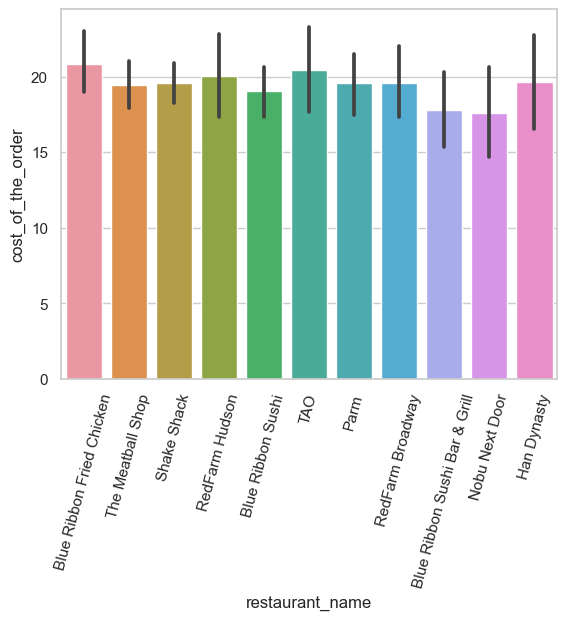

In [1010]:
#create a new data frame with the filtered values of restaurants with more than 40 orders
popular_df = df[df['restaurant_name'].map(df['restaurant_name'].value_counts()) > 40]
#create a barplot using the new data frame to represent the mean cost of the order 
#by restaurant name
sns.barplot(data = popular_df, x = 'restaurant_name', y = 'cost_of_the_order')
plt.xticks(rotation = 75)
plt.show()

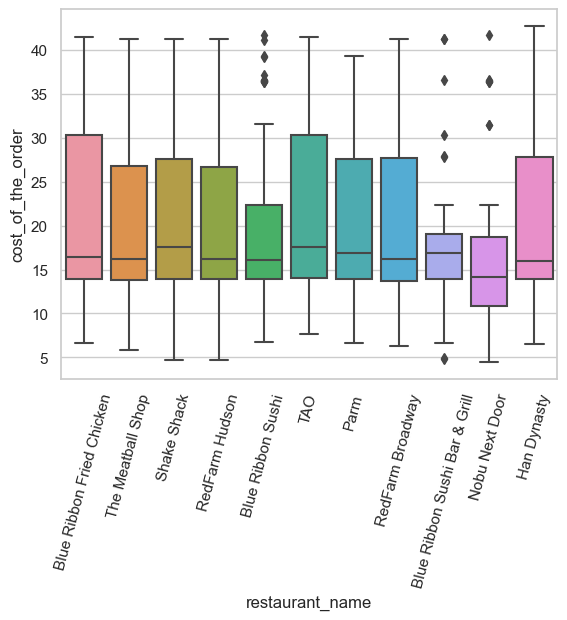

In [1011]:
#create a new data frame with the filtered values of restaurants with more than 40 orders
popular_df = df[df['restaurant_name'].map(df['restaurant_name'].value_counts()) > 40]
#create a set of boxplots using the new data frame to represent the min, max, median, 
#and IQR values of the cost of the order by restaurant name
sns.boxplot(data = popular_df, x = 'restaurant_name', y = 'cost_of_the_order')
plt.xticks(rotation = 75)
plt.show()

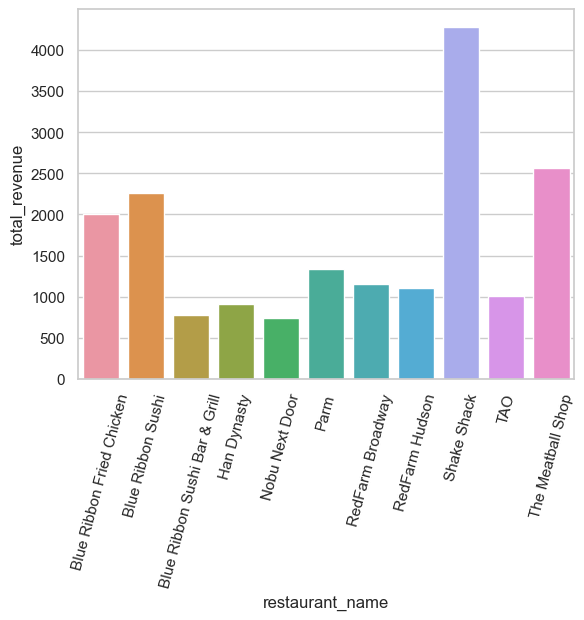

In [1012]:
#create a new data frame with the filtered values of restaurants with more than 40 orders
popular_df = df[df['restaurant_name'].map(df['restaurant_name'].value_counts()) > 40]
#group the restaurant name and cost of the order and determine the total revenue per restaurant
restaurant_revenue = popular_df.groupby('restaurant_name')['cost_of_the_order'].sum()
#create a new dataframe and determine the index and values
restaurant_df = pd.DataFrame({'restaurant_name': restaurant_revenue.index, 'total_revenue': restaurant_revenue.values})
#create a barplot with the new dataframe and represent the total revenue per restaurant
sns.barplot(data = restaurant_df, x = 'restaurant_name', y = 'total_revenue');
plt.xticks(rotation = 75)
plt.show()

#### Observations:

When looking at the relationship between restaurant name and cost of order, I first wanted to view some of the descriptive statistics, such as the mean, median, and total revenue that each restaurant made to see if there may be a relationship between how much people pay for their orders and how often they eat there. The mean and median cost of orders among the more popular restaurants were pretty similar between restaurants. The mean ranged from around 15-17 dollars. The box plot demonstrates that the median also stayed fairly consistent with a drop at Nobu Next Door, whose median was comparable to the other restaurants 25th percentile. I also looked at the total revenue by using the .sum() method for cost_of_the_order per unique restaurant. As the mean and median stayed consistent, it is no surprise that the total revenue is very similar to the restaurant_name countplot from earlier. 

#### vs. day_of_the_week

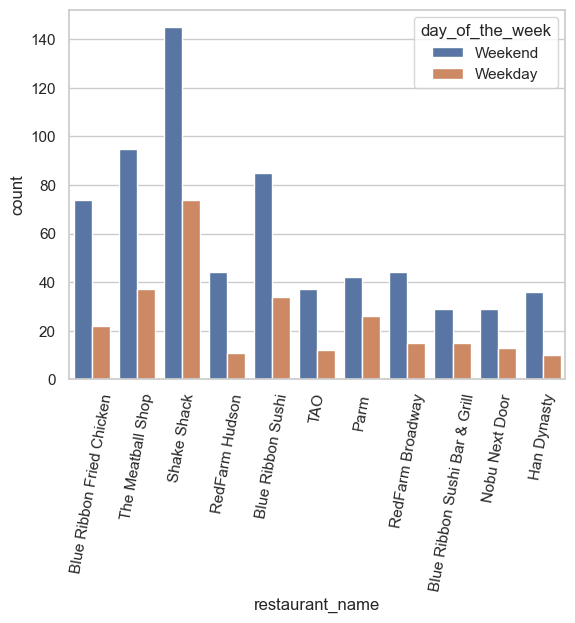

In [1013]:
#create a new data frame with the filtered values of restaurants with more than 40 orders
popular_df = df[df['restaurant_name'].map(df['restaurant_name'].value_counts()) > 40]
#create a countplot with the new data frame to represent the number of orders per restaurant based on the day of the week
sns.countplot(data = popular_df, x = 'restaurant_name', hue = 'day_of_the_week')
plt.xticks(rotation = 80)
plt.show()

#### Observations:

The data stays consistent across variables. I considered that some restaurants may be more popular on the weekends vs the weekdays or vice versa, but the countplot shows that, while people tend to order more on weekends, the trends between restaurants remain the same regardless of weekend or weekday.

#### vs. food_preparation_time

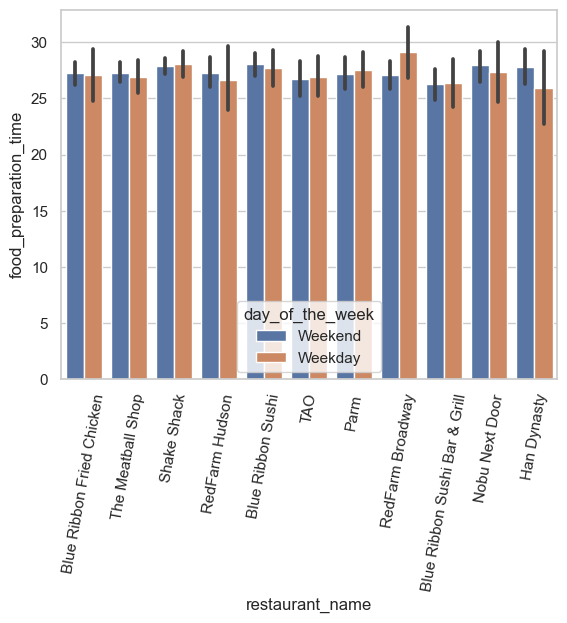

In [1014]:
#create a new data frame with the filtered values of restaurants with more than 40 orders
popular_df = df[df['restaurant_name'].map(df['restaurant_name'].value_counts()) > 40]
#create a barplot with the new dataframe to determine the average food preparation time
#per restaurant based on the day of the week
sns.barplot(data = popular_df, x = 'restaurant_name', y = 'food_preparation_time', hue = 'day_of_the_week')
plt.xticks(rotation = 80)
plt.show()

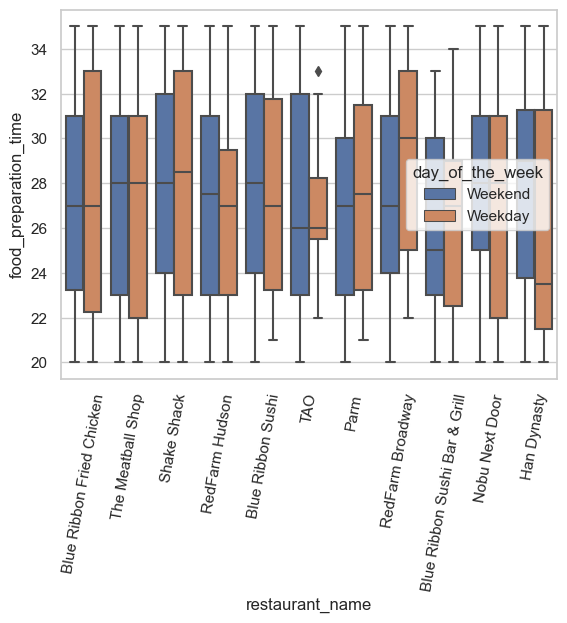

In [1015]:
#create a new data frame with the filtered values of restaurants with more than 40 orders
popular_df = df[df['restaurant_name'].map(df['restaurant_name'].value_counts()) > 40]
#create a set of boxplots using the new data frame to represent the min, max, median, 
#and IQR values of the food preparation time by restaurant name based on the day of the week
sns.boxplot(data = popular_df, x = 'restaurant_name', y = 'food_preparation_time', hue = 'day_of_the_week')
plt.xticks(rotation = 80)
plt.show()

#### Observations:

The purpose of analyzing restaurant names against food preparation time with day of the week as a hue was to determine whether the larger number of orders over the weekend would create longer food preparation times in any of the restaurants. Interstingly, the food preparation time stayed consistent in just about all of the restaurants across weekdays and weekends. RedFarm Broadway had the largest gap in food preparation time with an average time around 28 minutes on the weekdays and around 26.5 minutes on the weekends. The boxplot gave a little more insight into the data showing that, on the weekdays, Han Dynasty has a median food preparation time that is below 24 minutes, far lower than other median values from other restaurants, and even lower than the 25th percentile of its own weekend food preparation time. This is far different than RedFarm Broadway, which has a median preparation time that is about 3 minutes longer on weekdays than on the weekends, while TAO has a median time value that is equal across days of the week, but has a much more compact distribution of time values on the weekday when compared to the weekend. 

### 3. cuisine_type

#### vs. cost_of_the_order

In [1016]:
#group the variables cuisine type and cost of the order and create a new dataframe 
#with the series' mean, median, and sum
restaurant_stats = df.groupby('cuisine_type')['cost_of_the_order'].agg(['mean', 'median', 'sum'])
#reset the dataframe index
restaurant_stats = restaurant_stats.reset_index()
#show all of the cuisine types
restaurant_stats.head(13)

,cuisine_type,mean,median,sum
0,American,19.536051,16.23800,11409.0540
1,Chinese,19.514700,16.23800,4195.6605
2,French,24.026806,24.60300,432.4825
3,Indian,20.303205,18.57250,1482.1340
4,Italian,19.663270,16.65200,5859.6545
5,Japanese,19.449733,16.18050,9141.3745
6,Korean,16.563308,14.00700,215.3230
7,Mediterranean,18.438435,16.09425,848.1680
8,Mexican,20.266792,17.90550,1560.5430
9,Middle Eastern,22.770684,18.74500,1115.7635


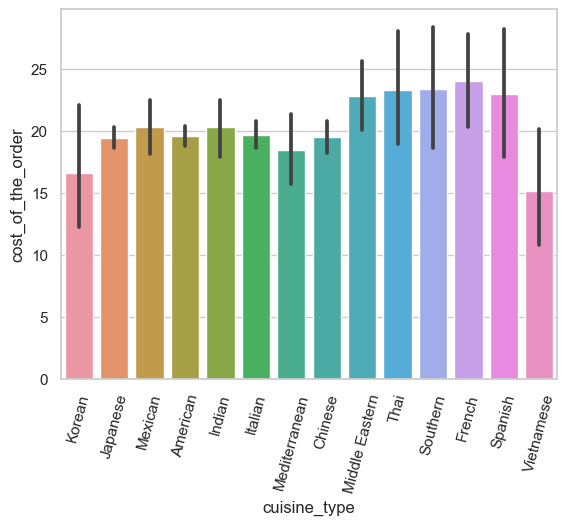

In [1017]:
#create a bar plot to represent the average cost of the order per cuisine type
sns.barplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order')
plt.xticks(rotation = 75)
plt.show()

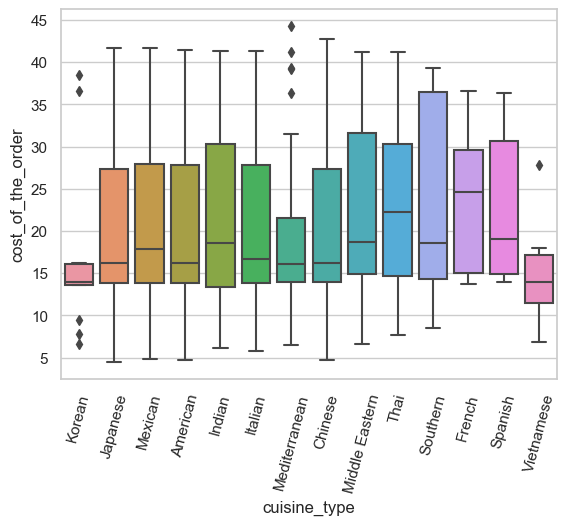

In [1018]:
#create a set of boxplots to represent the min, max, median, and IQR values of 
#cost of the order by cuisine type 
sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order')
plt.xticks(rotation = 75)
plt.show()

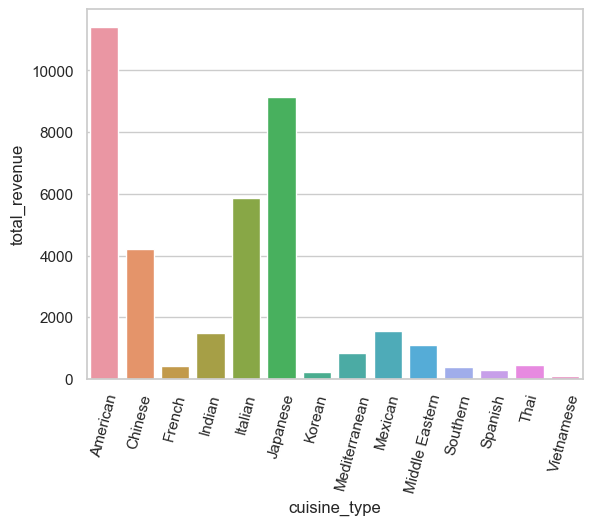

In [1019]:
#create a total revenue series in a new dataframe with the grouped cuisine type 
#and cost of the order
restaurant_revenue = df.groupby('cuisine_type')['cost_of_the_order'].sum()
#create a new dataframe and determine the index and values
restaurant_df = pd.DataFrame({'cuisine_type': restaurant_revenue.index, 'total_revenue': restaurant_revenue.values})
#create a barplot to represent the total revenue of each cuisine type
sns.barplot(data = restaurant_df, x = 'cuisine_type', y = 'total_revenue');
plt.xticks(rotation = 75)
plt.show()

In [1020]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_food_time
0,1477147,337525,Hangawi,Korean,38.4375,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,13.8920,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,14.0645,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,36.5000,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,13.3285,Weekday,4,25,24,49


#### Observations:

For this analysis againt cost of the order, I asked the same questions of cuisine types as I did restaurant names. I wanted to determine which cuisine types were the most expensive and which brought in the most revenue. Orders from Middle Eastern, Thai, Southern, French, and Spanish cuisine averaged around 3-4 dollars more than any other cuisine type, which averaged around 16 dollars, except for Korean and Vietnamese, which averaged between 12 and 14 dollars, respectively. This trend stayed consistent with Middle Eastern, Southern, and Spanish cuisine having a slightly higher median and Thai and French having a much higher median, as well. This may correlate with lower food orders as these 5 cuisine types have far fewer orders than others that trend cheaper. The exceptions would again be Korean and Vietnamese cuisine, which despite having far lower mean and median prices, also have the lowest overall sales. 

#### vs. day_of_the_week

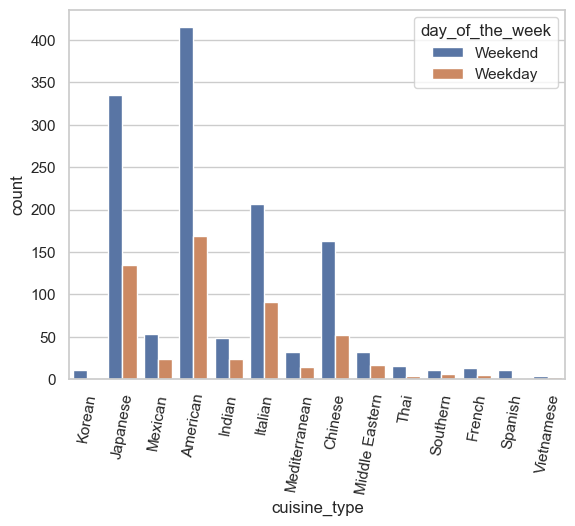

In [1021]:
#create a counplot to represent the number of orders by cuisine type based on 
#day of the week
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week')
plt.xticks(rotation = 80)
plt.show()

#### Observations:

As is the trend in this data set, there were far more orders on the weekend than the weekday across all cuisine types.  

#### vs. food_preparation_time

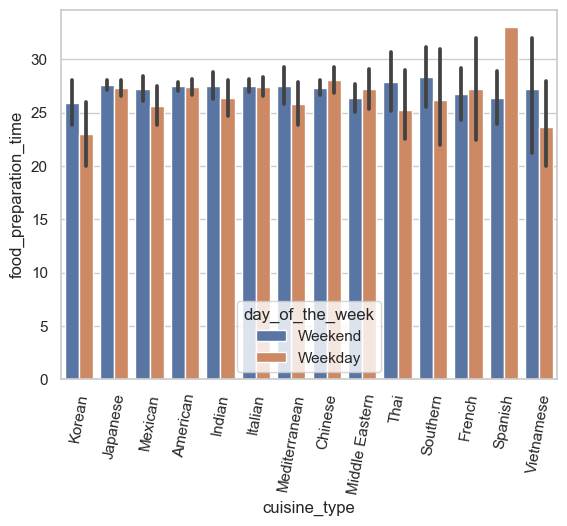

In [1022]:
#create a barplot to show the average food preparation time by cuisine type 
#based on day of the week
sns.barplot(data =df, x = 'cuisine_type', y = 'food_preparation_time', hue = 'day_of_the_week')
plt.xticks(rotation = 80)
plt.show()

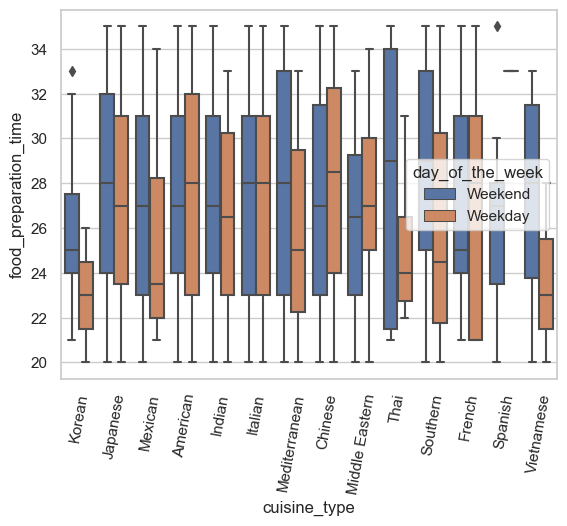

In [1023]:
#create a set of boxplots to represent the min, max, median, and IQR values of the 
#food preparation time for each cuisine type based on day of the week
sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time', hue = 'day_of_the_week')
plt.xticks(rotation = 80)
plt.show()

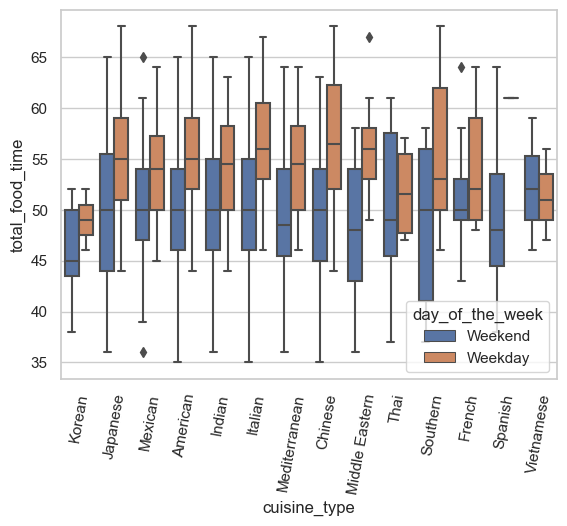

In [1024]:
#create a new variable for the sum of food preparation time and delivery time
df['total_food_time']= df['food_preparation_time'] + df['delivery_time']
#create a set of boxplots to represent the min, max, median, and IQR values of the 
#food preparation time + delivery time for each cuisine type based on day of the week
sns.boxplot(data = df, x = 'cuisine_type', y = 'total_food_time', hue = 'day_of_the_week')
plt.xticks(rotation = 80)
plt.show()

#### Observations:

Similar to restaurant names, cuisine types trend pretty evenly for food preparation time across weekdays and weekends. Spanish cuisine seems to take far longer to prepare during the weekdays, but there is only one data point so it may not be indicative of what could be normal. Korean and Vietnamese have the fastest average and median food preparation time on the weekends. Thai cuisine has a much lower median time value on weekends than weekdays and a much tighter distribution of time values. Italian food preparation appears to be nearly exactly the same regardless of day of the week. 

### 4. cost_of_the_order

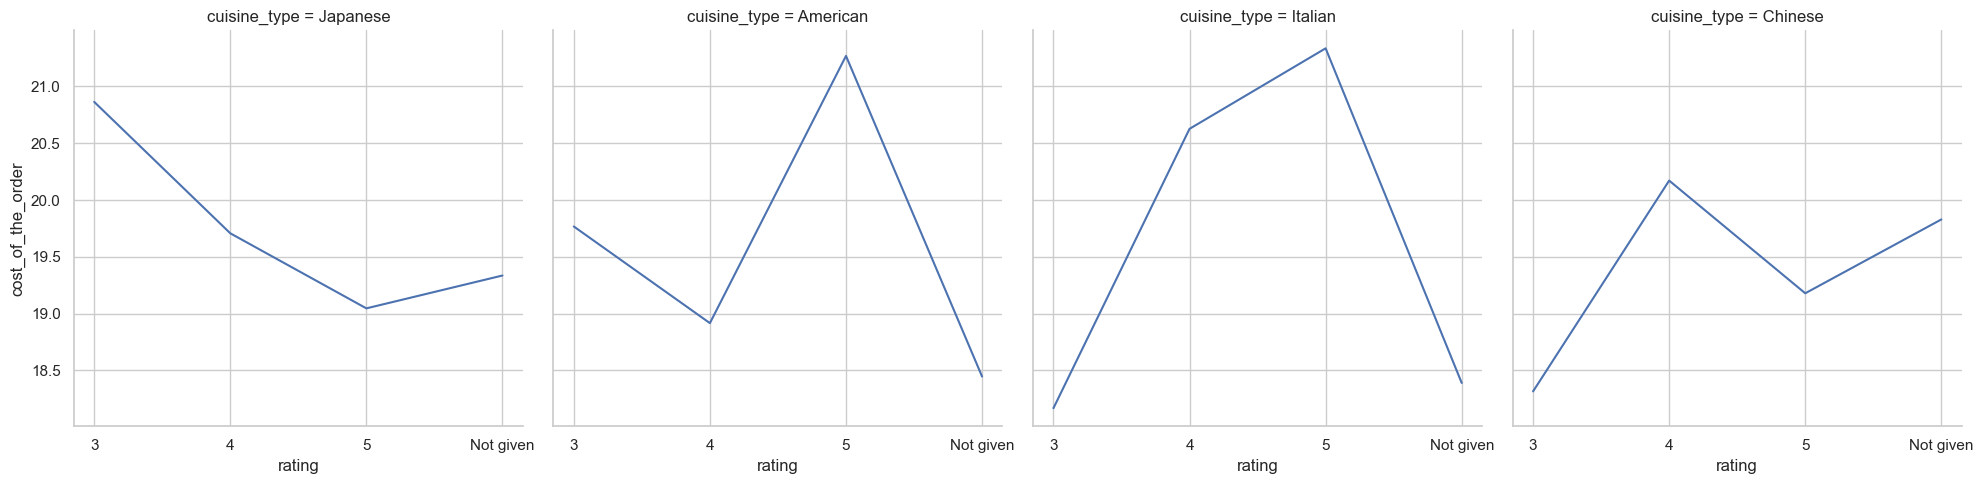

American    584
Japanese    470
Italian     298
Chinese     215
Name: cuisine_type, dtype: int64


In [1026]:
#The rating was in the wrong order, (4,3,5), so I made ordered = True to make the 
#graphs and plots easier to understand
df['rating']=pd.Categorical(df['rating'], ordered = True)
#determine how many orders were received by each cuisine type
cuisine_type_count = df['cuisine_type'].value_counts()
#filter out any cuisine types that received 80 or fewer orders
popular_cuisine_type = cuisine_type_count[cuisine_type_count>80]
#create relplot to determine the correlation between cost of the order and rating 
#based on cuisine type
sns.relplot(data=df[df['cuisine_type'].isin(popular_cuisine_type.index)],x='rating',y='cost_of_the_order',col= 'cuisine_type',kind='line', ci=None, col_wrap=4)
plt.show()
#print the popular cuisine types and thee number of orders
print(popular_cuisine_type)

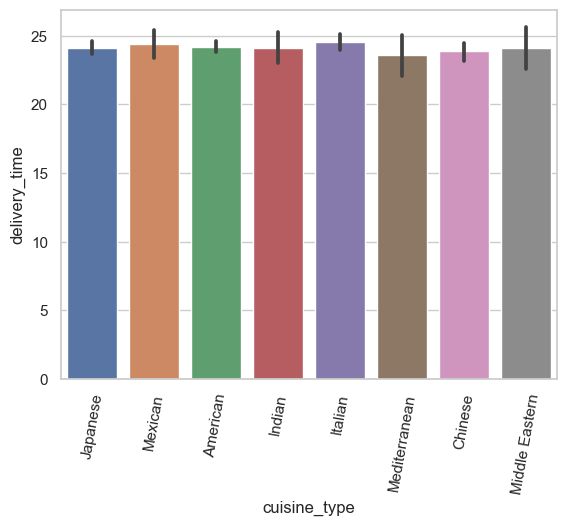

In [1027]:
#create a new dataframe with the filterd cuisine types with more than 40 orders
popular_df = df[df['cuisine_type'].map(df['cuisine_type'].value_counts()) > 40]
#create a barplot using the new dataframe to show the average delivery time by cuisine type
sns.barplot(data = popular_df, x = 'cuisine_type', y = 'delivery_time')
plt.xticks(rotation = 80)
plt.show()

#### Observations:

For this cost_of_the_order analysis, I wanted to see what the effect of cost had on the rating by cuisine_type. I chose to look at only cuisine types that had received greater than 80 orders. 
The relplot shows that there was a negative correlation between cost_of_the_order and rating for Japanese cuisine, while inversely, there was a pretty significant positive correlation for Italian cuisine. 
While there wasnt necessarily a positive correlation between cost_of_the_order and rating for American cuisine, it does appear that if the food was more expensive, the restaurant was more likely to receive a 5 star rating. For Chinese cuisine, the same was true for the 4 star rating. 

#### vs. day_of_the_week

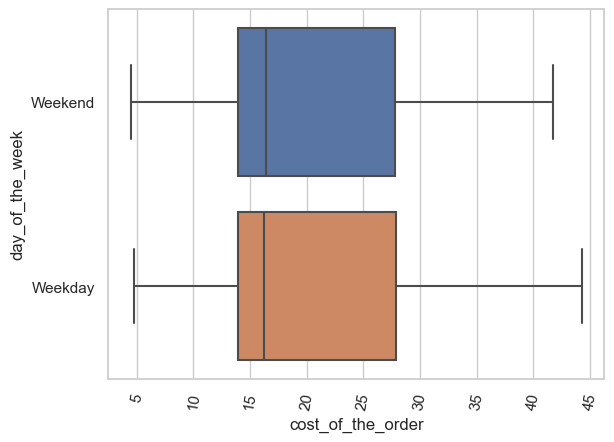

In [1028]:
#create a set of boxplots to represent the min, max, median, and IQR values of the 
#cost of the order based on day of the week
sns.boxplot(data = popular_df, x = 'cost_of_the_order', y = 'day_of_the_week')
plt.xticks(rotation = 80)
plt.show()

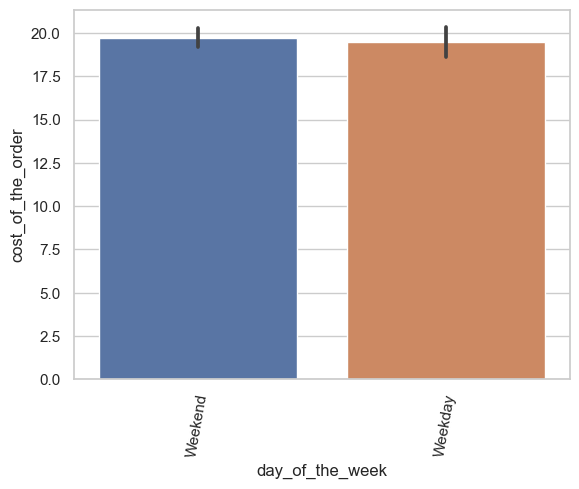

In [1029]:
#create a barplot to represent the average cost of the order based on day of the week
sns.barplot(data = popular_df, y = 'cost_of_the_order', x = 'day_of_the_week')
plt.xticks(rotation = 80)
plt.show()

  day_of_the_week  total_cost
0         Weekday  10676.5545
1         Weekend  26804.5685


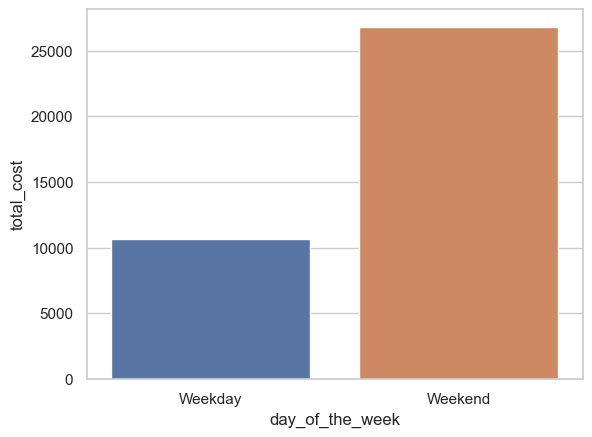

In [1030]:
#group day of the week and cost of the order into a new dataframe to and use the sum 
#function to get the total revenue
total_cost = df.groupby('day_of_the_week')['cost_of_the_order'].sum()
#reset the index and name the series 'total_cost'
total_cost = total_cost.reset_index(name = 'total_cost')
#print the total cost values for the days of the week
print(total_cost)
#create a barplot to represen the total cost of orders based on the day of the week
sns.barplot(data = total_cost, x = 'day_of_the_week', y = 'total_cost');

#### Observations:

When analyzing only the relationship of cost of the order and day of the week, it is apparent that there was very little difference in the cost of the orders between the two categories. The largest difference is the max value of the weekday boxplot which reaches just over 35 dollars, while the max value of the weekend box plot remains around 33 dollars. However, when you analyze the days of the week by the sum of the cost of the orders, it is obvious that in total, far more money is spent on food orders over the weekend than during the week.

#### vs. food_preparation_time

<AxesSubplot:xlabel='cost_of_the_order', ylabel='food_preparation_time'>

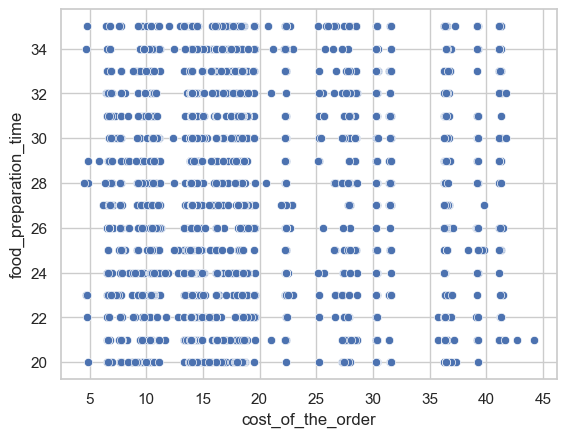

In [1031]:
#create a scatterplot to represent the correlation between cost of the order and food 
#preparation time
sns.scatterplot(data = df, x = 'cost_of_the_order', y = 'food_preparation_time')

<AxesSubplot:xlabel='cost_of_the_order', ylabel='food_preparation_time'>

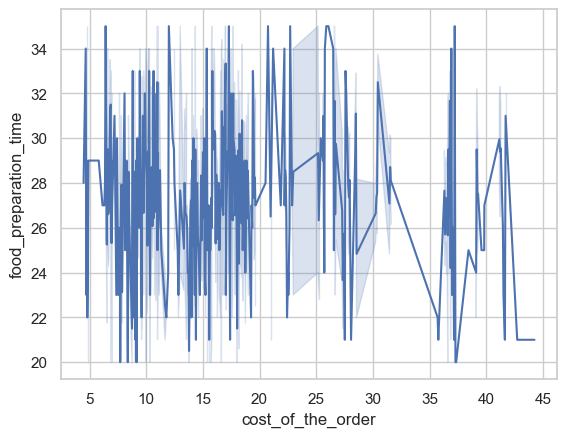

In [1032]:
#create a scatterplot to represent the correlation between cost of the order and food preparation time
sns.lineplot(data = df, x = 'cost_of_the_order', y = 'food_preparation_time')

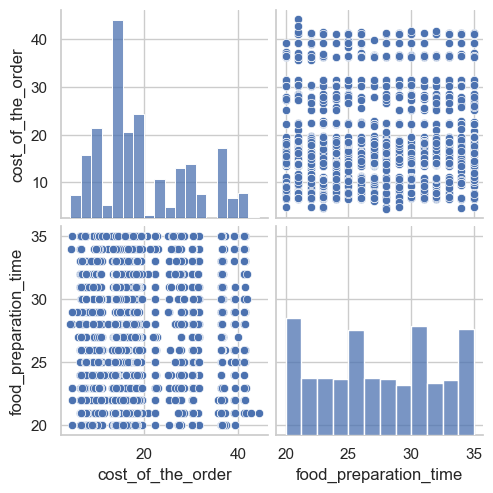

In [1033]:
#create a pairplot to represent the correlation between cost of the order and 
#food preparation time
sns.pairplot(data = df, vars= ['cost_of_the_order', 'food_preparation_time'])

#### Observations:

There seems to be little to no relationship between food_preparation_time and cost_of_the_order

### 5. day_of_the_week

#### Observations:



#### vs. delivery_time

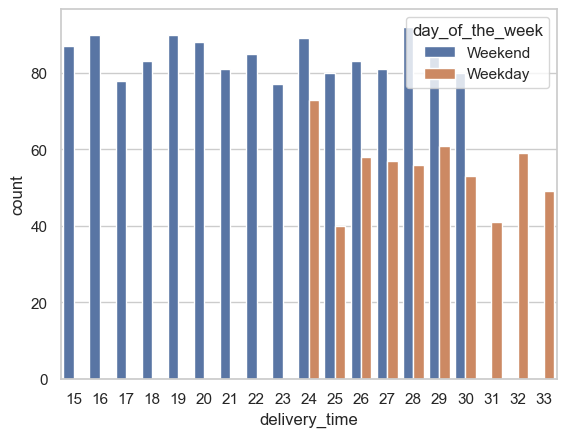

In [1034]:
#create a countplot to represent the number of deliveries that were made 
#within a certain time based on day of the week
sns.countplot(data = df, x = 'delivery_time', hue = 'day_of_the_week');

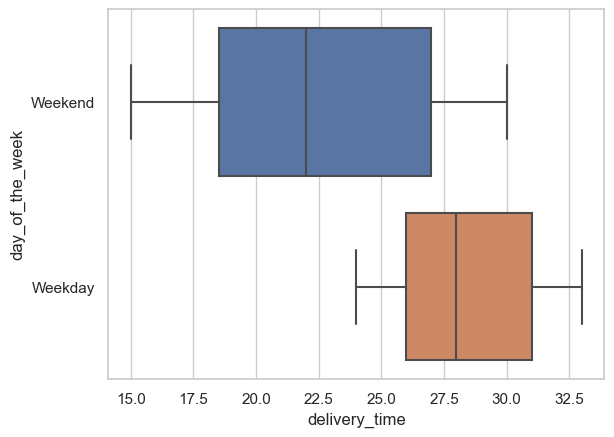

In [1035]:
#create a set of boxplots to represent the min, max, median, and IQR values of the delivery time
#based on day of the week
sns.boxplot(data = df, x = 'delivery_time', y = 'day_of_the_week');

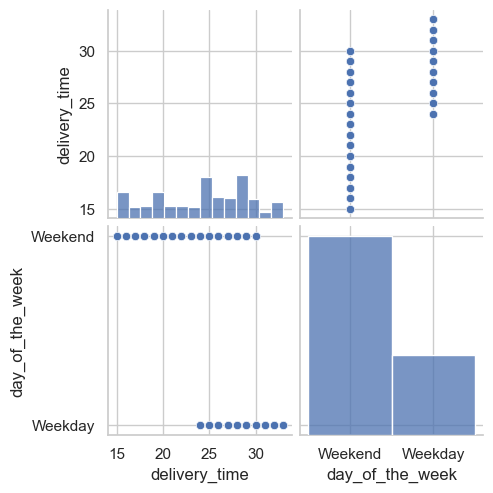

In [1036]:
#create a pairplot to represent the correlation between delivery time and day of the week
sns.pairplot(data = df, vars=['delivery_time', 'day_of_the_week'])

#### Observations:

The correlation between delivery time and day of the week is surprising. It seems that during the weekdays, there are no deliveries that last fewer than 24 minutes with the longest delivery time taking over 32 minutes, but over the weekend, there are no deliveries that last longer than 30 and the shortest delivery time was 15 minutes. This may account for why there are so many more orders over the weekend than there are during the week.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

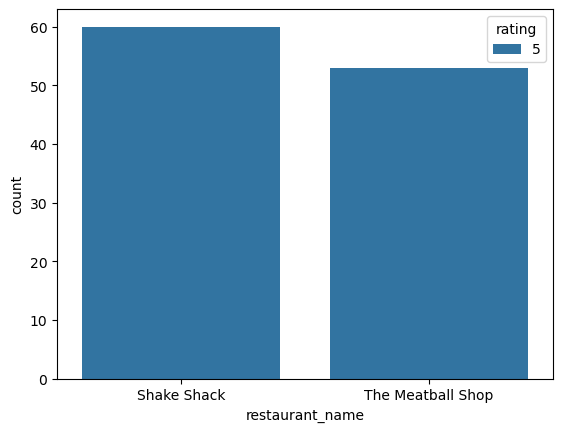

In [13]:
#filter the dataframe to remove any ratings that are not 5 and create a new 
#dataframe with the results
df_filtered = df[df['rating']== '5']
#create a new dataframe of the filtered restaurant names with the order frequencies
restaurant_count = df_filtered['restaurant_name'].value_counts()
#filter the new dataframe to only show restaurants with more than 50 ratings
popular_restaurants = restaurant_count[restaurant_count > 50].index.tolist()
#create a new dataframe with the restaurant names from the filtered dataframes
df_popular = df_filtered[df_filtered['restaurant_name'].isin(popular_restaurants)]
#create a countplot to represent how many orders were made based on rating and 
#restaurant name using the new dataframe
sns.countplot(x='restaurant_name', hue='rating', data=df_popular);

#### Observations:

The Shake Shack and The Meatball Shop are the only restaurants that have more than 50 5 star ratings (greater than 4 stars and no 'Not given). 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [14]:
#locate any order greater than $20 and multiply it by 1.25 (25%)
df.loc[df['cost_of_the_order']>20, 'cost_of_the_order'] *=1.25
#locate any order between $5 and $20 and multiple it by 1.15 (15%)
df.loc[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20), 'cost_of_the_order'] *=1.15
#use the .sum() function to determine the total cost with the changed order prices
total_cost= df['cost_of_the_order'].sum()
#print the total cost
print(total_cost)

37481.123


#### Observations:

Using the .loc() function, I was able to add 25% to every value above 20 and 15% to every value between 5 and 20. The total revenue generated by the company across all orders is 37481.12 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [1041]:
# create a new series that represents the sum of the food preparation time 
#and delivery times series
df['total_food_time']= df['food_preparation_time'] + df['delivery_time']
#filter out any total food time that is 60 minutes or less
df_long = df[df['total_food_time']>60]
#multiple the number of orders in the filtered dataframe by the number of 
#orders in the original dataframe and multiply the quotient by 100 to get the percentage
df_percent = len(df_long)/len(df)*100
#print the percentage value
print(df_percent)

10.537407797681771


#### Observations:

10.54% of the orders took longer than 60 minutes to arrive from the time that they were delivered. 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [1042]:
#create a new dataframe using only the rows containing weekday values from the day
#of the week series
df_weekday = df[df['day_of_the_week']=='Weekday']
#find the mean delivery time in the new dataframe
df_wkday_dt_mean = df_weekday['delivery_time'].mean()
#print the mean delivery time for weekdays
print(f'The mean delivery time during the week is ',df_wkday_dt_mean)
#create a new dataframe using only the rows containing weekend values from the day
#of the week series
df_weekend = df[df['day_of_the_week']=='Weekend']
#find the mean delivery time in the new dataframe
df_wkend_dt_mean = df_weekend['delivery_time'].mean()
#print the mean delivery time for weekend
print(f'The mean delivery time during the weekend is ',df_wkend_dt_mean)

The mean delivery time during the week is  28.340036563071298
The mean delivery time during the weekend is  22.4700222057735


#### Observations:

During the week, the mean delivery time is 28.34 minutes. During the weekend, the mean delivery time is 22.47 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Restaurants that serve American and Japanese cuisine represent the highest number of orders, followed by Italian and Chinese cuisine, respectively.
*  736 (38.78%) of orders were not given ratings. Of the ratings given, 588 (50.60%) of orders were given a 5 star rating, 386 (33.22%) of orders were given a 4 star rating, and 188 (16.18%) of orders were given a 3 star rating. There were no 2 star or 1 star ratings given.
*  There was a very slight trend towards a 3 star rating when food took a little bit longer. This was the only trend that seemed to effect the ratings in any discernable way.
*  Weekday delivery times tend to take longer than Weekend delivery times. On Weekends, delivery times may be as low as 15 minutes, while during the week, there were no delivery times lower than 24 minutes  with the longest times exceeding 32 minutes.
*  Weekends are much busier than weekdays. The frequency of weekend orders was 1351 (71.18%) and the frequency of Weekday orders was 547 (28.82%).

### Recommendations:

*  Based on the high number of orders received from American, Japanese, Italian, and Chinese cuisines, I would recommended establishing partnerships with restaurants in these categories. These partnerships would involve mutual promotion of deals and discounts, with the restaurants advertising through our platform and vice versa. I would recommend starting with popular restaurants such as Shake Shack, The Meatball Shop, Blue Ribbon Fried Chicken, and Blue Ribbon Sushi, which have the highest number of orders. This approach should generate more business for your business and the participating restaurants and should increase customer loyalty.

*  Analysis of the ratings received shows that an overwhelming 85% of customers had positive experiences (4 star and 5 star ratings) with your service, while just over 15% rated the service as average (3 star rating). This suggests that the majority of users are satisfied with your product. However, approximately 40% of orders' rating was 'Not given', indicating a potential loss of valuable feedback. To address this issue, I would recommended incentivizing customers to leave ratings regardless of the rating value. These incentives could include discounts on future orders, promotional offers, or other perks that would motivate customers to provide feedback. This approach will provide more information about our user base and improve overall customer satisfaction.

*  To improve the user experience, I would recommended creating a clock or timer that initially estimates the total time it takes for food to arrive. This would be based on the data collected from restaurants, which would provide information on the average preparation and delivery time for each cuisine type or even each restaurant name. Taking into account the user's location and whether it is a weekday or the weekend, the application would provide an estimated delivery time, updated in real-time as the driver moves closer to the user's location. This feature would manage customer expectations, especially in cases where delivery times are estimated to be longer. The system would use the 75th percentile value for delivery times, as this is more likely to represent an accurate time estimate that is not too long or too short and will create a more positive response in customers in the cases that the orders are received earlier than expected.

*  I would also recommended to increase the number of available delivery drivers to improve the delivery times, especially on weekdays when there may currently be fewer drivers available due to competing work schedules. An advertising campaign could target young drivers who are likely to have more flexible schedules, as well as other potential driver pools. Additionally, I would recommend investigating the possible link between slower delivery times on weekdays and lower order volumes during this time. Addressing this issue could potentially lead to an increased number of orders from customers who may not currently order on a weekday because of the increased wait time and their own busy work schedule.

---